# **VIDEO GAME SALES**

What this includes : It includes Dataset about video game sales in years 1980 - 2020 along with their publisher, genre, and region wise sales.

Dataset Source : https://drive.google.com/file/d/1nLdLEEcb6uLxze75OrfplvttxEcmjd-7/view?usp=drive_web&authuser=0

In [ ]:
#importing the required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set the search parameters for locating file containing marriage dataset
filename = 'vgsalesGlobale.csv'
search_path = '/content/drive/My Drive/DATA MINING/Wines.csv'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [ ]:
# reading the video game sales dataset
df=pd.read_csv(file_path, header=0)
df

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
missing_values = df.isnull().sum()
missing_values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
rows_with_null_year = df.loc[df['Year'].isnull()]

# DataFrame to display the rows with null 'Year'
df_null_years = pd.DataFrame(rows_with_null_year)

# DataFrame with rows containing null 'Year'
df_null_years

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


## Global Sales Comparison: Missing vs. Available Years

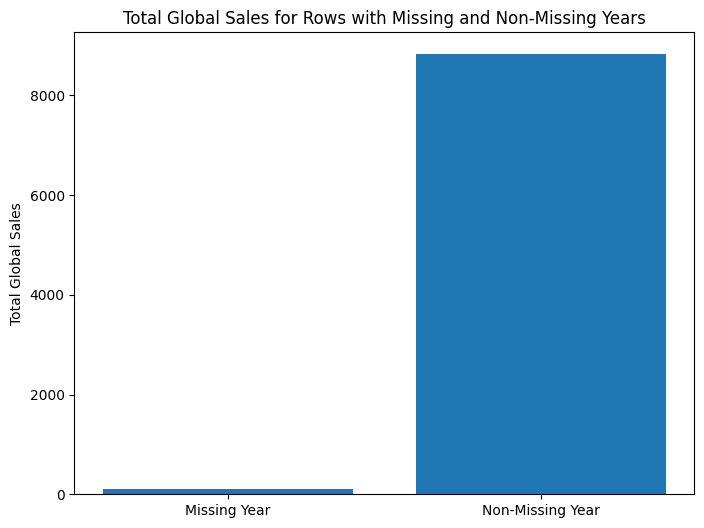

In [ ]:
rows_with_missing_year = df[df['Year'].isnull()]
rows_with_non_missing_year = df[df['Year'].notnull()]

# Bar plot to compare total global sales between the two groups
plt.figure(figsize=(8, 6))
plt.bar(['Missing Year', 'Non-Missing Year'],
        [rows_with_missing_year['Global_Sales'].sum(), rows_with_non_missing_year['Global_Sales'].sum()])
plt.ylabel('Total Global Sales')
plt.title('Total Global Sales for Rows with Missing and Non-Missing Years')
plt.show()

In [ ]:
# Dropping null values from the dataframe
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# Conversion from float to int for "Year" column
df["Year"] = df["Year"].astype(int)
df

<ipython-input-8-4b919dbae1ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype(int)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


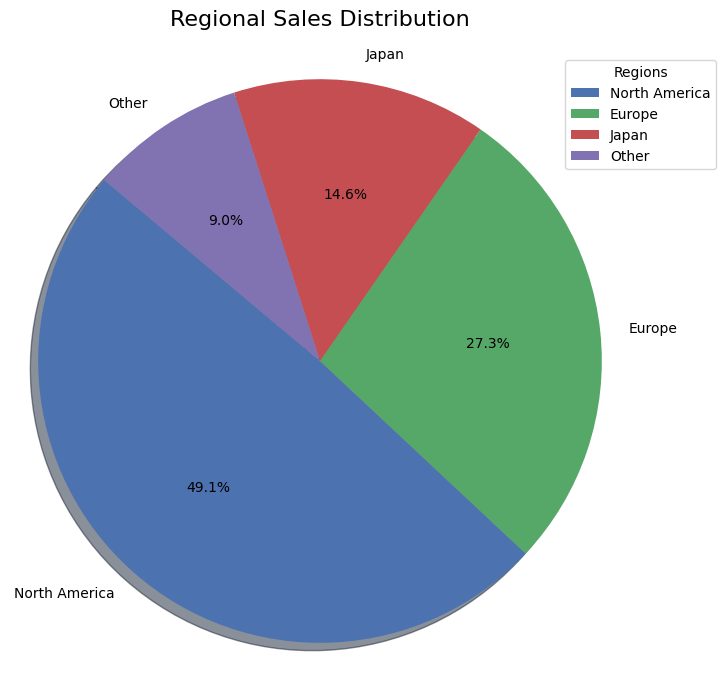

In [ ]:
# Group the data by region and calculate the total sales for each region
sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create labels for the pie chart
labels = ['North America', 'Europe', 'Japan', 'Other']

# Choose a visually appealing color palette
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.legend(title='Regions', loc='upper right', labels=labels, bbox_to_anchor=(1.15, 1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Regional Sales Distribution', fontsize=16, pad=20)
plt.gca().set_facecolor('#f2f2f2')  # Set background color
plt.show()

The significant share of sales in North America and Europe suggests that gaming companies may want to prioritize and strengthen their presence in these regions. Simultaneously, exploring growth opportunities in the Japanese and "Other" regions can lead to expanding their market reach.

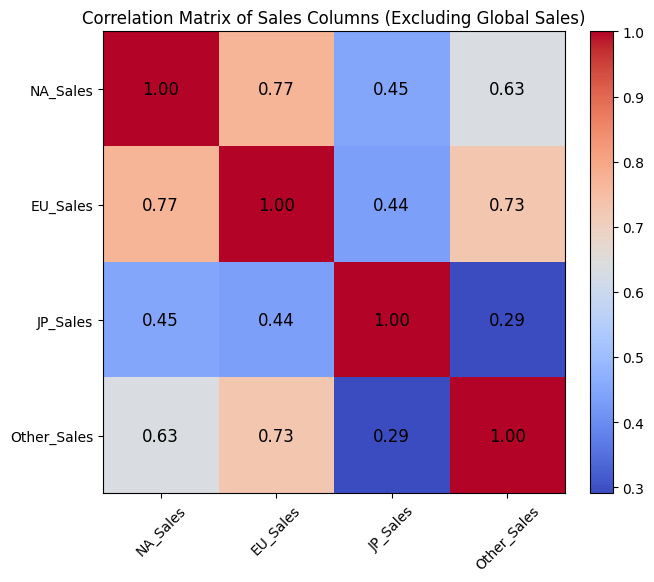

In [ ]:
# Select the sales columns for correlation analysis (excluding 'Global_Sales')
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_correlation = df[sales_columns]

# Calculate the correlation matrix
correlation_matrix = sales_correlation.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(sales_columns)):
    for j in range(len(sales_columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)

plt.colorbar(heatmap, fraction=0.046, pad=0.04)
plt.xticks(range(len(sales_columns)), sales_columns, rotation=45)
plt.yticks(range(len(sales_columns)), sales_columns)
plt.title('Correlation Matrix of Sales Columns (Excluding Global Sales)')
plt.show()

1. The strong and moderate positive correlations between sales in different regions suggest that successful games in one region are likely to perform well in other regions as well. This implies that there are global trends in the gaming industry, and games with wide appeal tend to resonate with players across different regions.

2. The weaker correlation between sales in Japan and other regions suggests that the gaming preferences and market dynamics in Japan may differ more significantly from other regions. This indicates the importance of considering regional-specific factors when releasing and marketing games in the Japanese market.

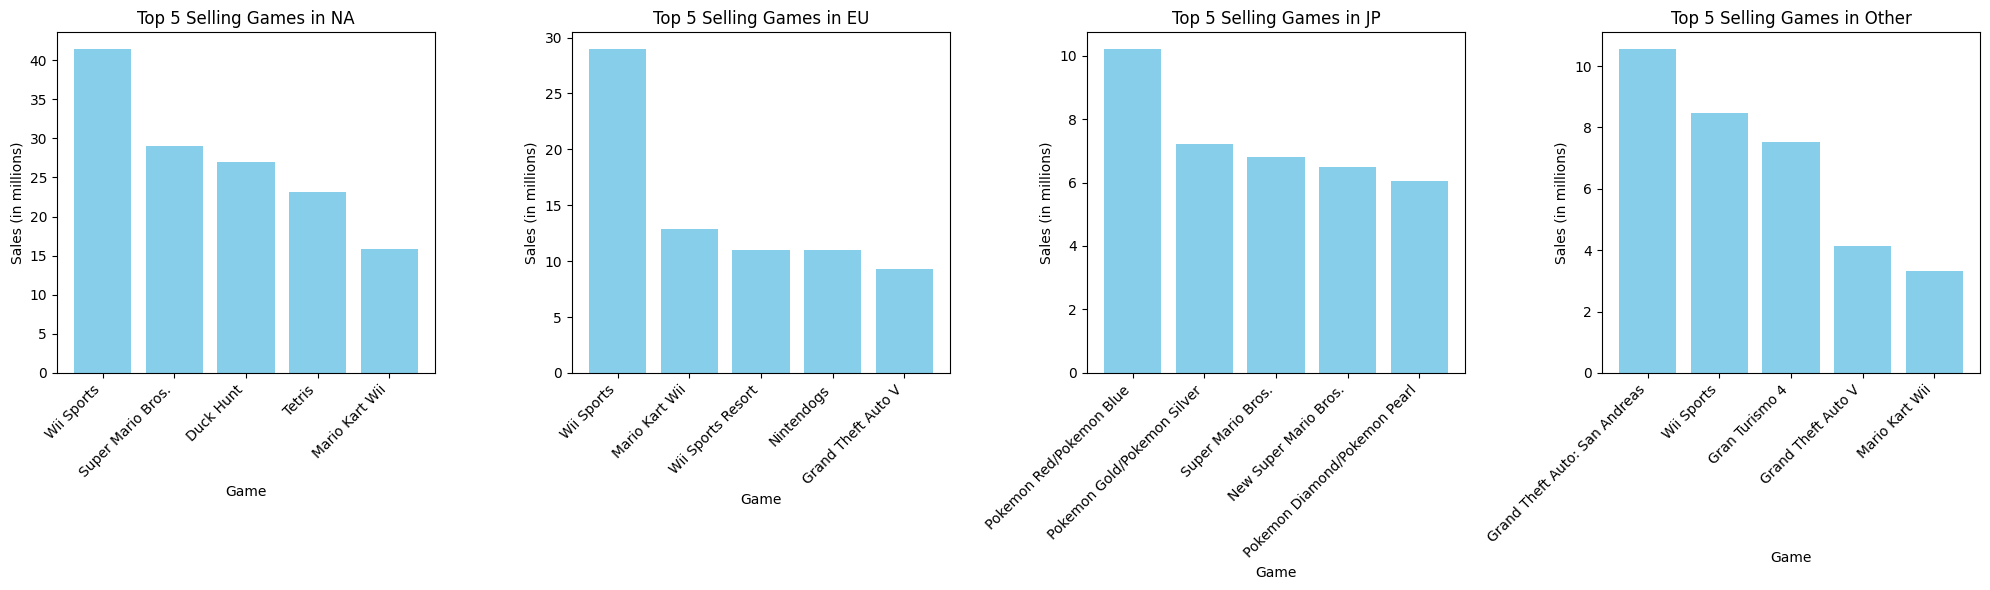

In [ ]:
def top_n_games_bar_chart(region, n):
    top_n_games = df.nlargest(n, region)
    plt.bar(top_n_games['Name'], top_n_games[region], color='skyblue')
    plt.xlabel('Game')
    plt.ylabel('Sales (in millions)')
    plt.title(f'Top {n} Selling Games in {region.split("_")[0]}')
    plt.xticks(rotation=45, ha='right')

# Bar charts for each region with top 5 games in a single row
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
top_n_games_bar_chart('NA_Sales', 5)  # Top 5 games in North America

plt.subplot(1, 4, 2)
top_n_games_bar_chart('EU_Sales', 5)  # Top 5 games in Europe

plt.subplot(1, 4, 3)
top_n_games_bar_chart('JP_Sales', 5)  # Top 5 games in Japan

plt.subplot(1, 4, 4)
top_n_games_bar_chart('Other_Sales', 5)  # Top 5 games in Other regions

plt.tight_layout()
plt.show()

1. "Wii Sports" is consistently among the top-selling games in most of the regions. This suggests that "Wii Sports" has a broad global appeal and performed exceptionally well worldwide.
2. Several games published by Nintendo, such as "Super Mario Bros." and "Mario Kart Wii," appear in multiple regions' top 5 lists. This indicates the success and popularity of Nintendo's games across different markets.
3. Japanese role-playing games (RPGs) are prominent in the Japanese market. Games like "Pokemon Red/Pokemon Blue," "Pokemon Gold/Pokemon Silver," and "Pokemon Diamond/Pokemon Pearl" have significant sales in Japan, reflecting the popularity of RPGs in this region.
4. The "Grand Theft Auto" series, represented by "Grand Theft Auto V" and "Grand Theft Auto: San Andreas," has notable sales in both North America and Other regions. This indicates the widespread popularity of this action-adventure franchise.

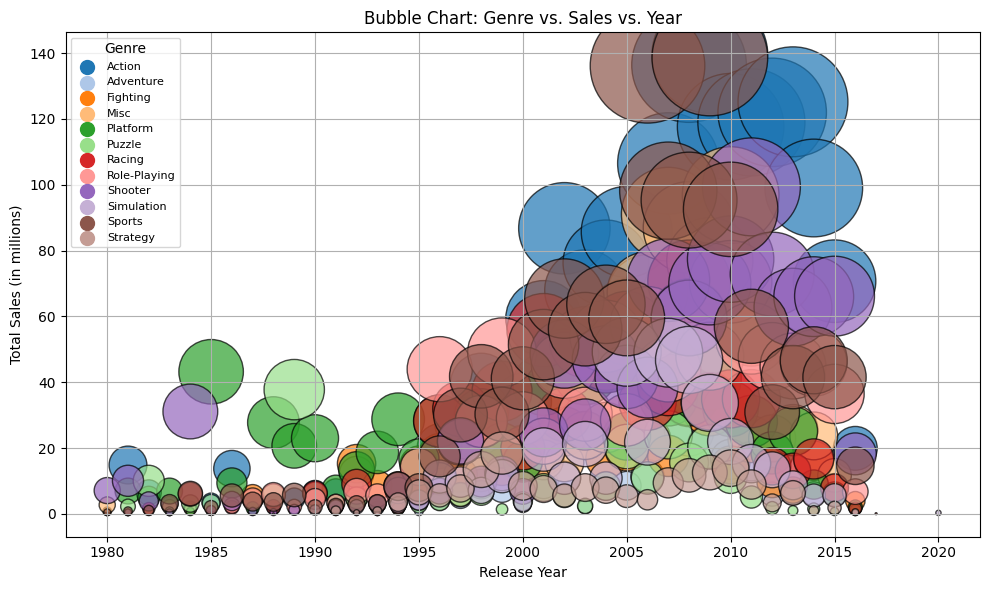

In [ ]:
# Group the data by Genre and Year, and calculate total sales for each group
genre_year_sales = df.groupby(['Genre', 'Year'], as_index=False)['Global_Sales'].sum()

# Create a unique color for each genre
unique_genres = genre_year_sales['Genre'].unique()
num_genres = len(unique_genres)
colors = plt.cm.tab20.colors[:num_genres]

# Create the bubble chart
plt.figure(figsize=(10, 6))

# Set the size of the bubbles based on the sales for each genre
bubble_sizes = genre_year_sales['Global_Sales'] * 50

# Plot the bubbles with the specified x, y, and size values
for i, genre in enumerate(unique_genres):
    genre_data = genre_year_sales[genre_year_sales['Genre'] == genre]
    plt.scatter(genre_data['Year'], genre_data['Global_Sales'], s=bubble_sizes[genre_data.index], c=[colors[i]], alpha=0.7, edgecolors='k')

# Create separate legends for each genre color with genre descriptions
for i, genre in enumerate(unique_genres):
    plt.scatter([], [], s=100, c=[colors[i]], label=genre)

plt.legend(title='Genre', loc='upper left', fontsize=8)

plt.xlabel('Release Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Bubble Chart: Genre vs. Sales vs. Year')
plt.grid(True)
plt.tight_layout()
plt.show()

The bubble chart visually represents the correlation between video game genre, total sales, and release year.

1. The bubble chart clearly highlights the significant dominance of genres such as "Sports," "Shooter," and "Action," as evidenced by their larger bubbles, indicating substantially higher total sales compared to other genres. This finding suggests that these genres have a broader appeal and consistently attract a larger audience of gamers across different regions and platforms.
  * The dominance of these genres could be attributed to various factors, including their engaging gameplay mechanics, immersive experiences, and strong franchise presence.

2. Notably, the total sales of video games experienced significant growth after 1995, with most genres witnessing a surge in sales every five years. This highlights potential cyclic trends in the gaming industry or the impact of emerging gaming technologies and platforms.

# **Games Released Year-Wise**

* In order to find the years in which most no of games released.
* we will create a dataframe that will contain Name of Games along with their Release Year and subsequently plot them.

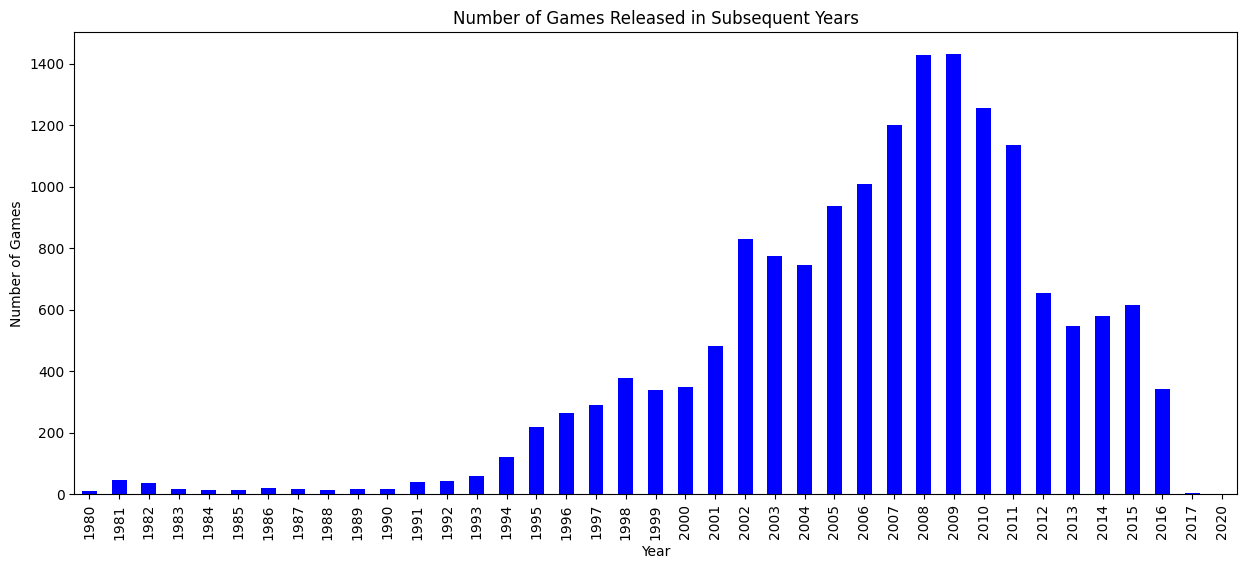

In [ ]:
# Group the Games by their release Year and count the occurrences in each group
Game_counts_by_year = df.groupby('Year')['Name'].count()

# Plotting the number of games year-wise in a bar plot
Game_counts_by_year.plot(kind='bar', figsize=(15, 6), color='Blue')

# Adding axis labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Released in Subsequent Years')

# Show the plot
plt.show()

## **INFERENCE**

*   From Above graph we can conclude that most Games released somewhat around 2008 - 09, but we don't have any clarity on this.
*   Lets plot the Max-5 & Min-5 from above, which will give us more clarity about game releases.

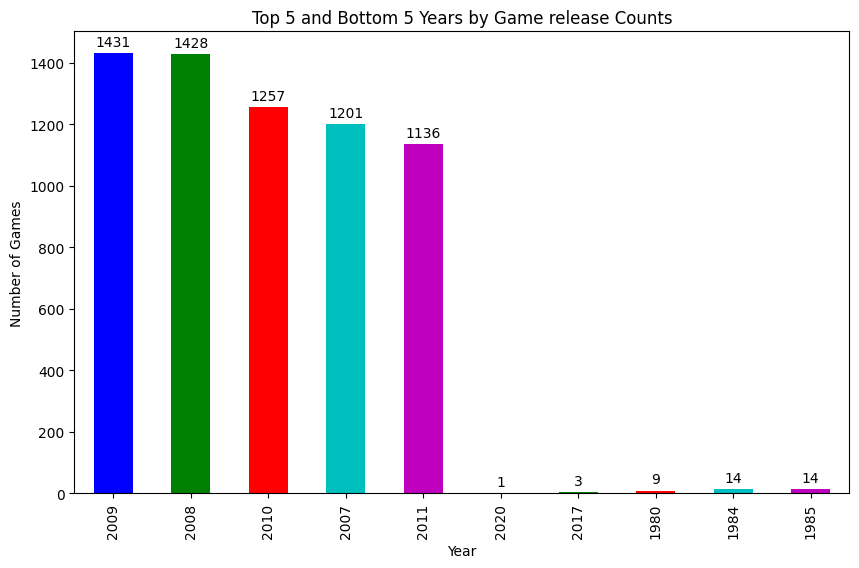

In [ ]:
# Get the maximum 5 counts
max_5 = Game_counts_by_year.nlargest(5)

# Get the minimum 5 counts
min_5 = Game_counts_by_year.nsmallest(5)

# Combine the maximum and minimum counts into a single DataFrame for plotting
combined_data = pd.concat([max_5, min_5])

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
ax = combined_data.plot(kind='bar', color=['b', 'g', 'r', 'c', 'm'])

# Adding axis labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Top 5 and Bottom 5 Years by Game release Counts')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.show()

## **INFERENCE**


From Above graph we can conclude that

> Top 5 Years in terms of Game Release are  :  2009, 2008, 2010, 2007, 2011  

Possible reason could be : Despite Great recession of 2008 & 2008 there was major boost in technology primarily in chip manufacturing ( evidently seen in South Asian economy which was not hampered at all by the recession, and major Game Developing Companies are situated in American continent whis took advantage and released large no of games just to boost sales and revive from recession.)

> Bottom 5 Years in terms of Game Release are (in decreasing order): 1985, 1984, 1980, 2017, 2020s

Possible reason could be for early years from (1980 - 1990) consumers did't have much stronger machines also E-Gaming was not so popular, and for year 2017 onward we had 2 stopping stones:
1. High Prices of GPUs, CPUs : ( Due to bitcoin mining )
2. Covid 19 ( FALSE ) ( WHAT IS CORRECT ONE, THEN? )


> **Question :**


        Why there is very less no of games released iin year 2020 despite Technological advancements?
* Possible Ans could be The industry was heavily affected by the impact of the COVID-19 pandemic which had begun in March and was characterized by COVID-19 lockdowns and remote work. While this caused numerous delays in software and hardware releases and the cancellation of live conferences and events in favor of virtual shows

# **Game Release Year & Publishers Active**

* Now we will find out the years in which most no of publishers are active.
* we will create a dataframe that will contain Release Years along with Publisher and subsequently plot them.

In [ ]:
publishers_by_year = df.groupby('Year')['Publisher'].nunique()

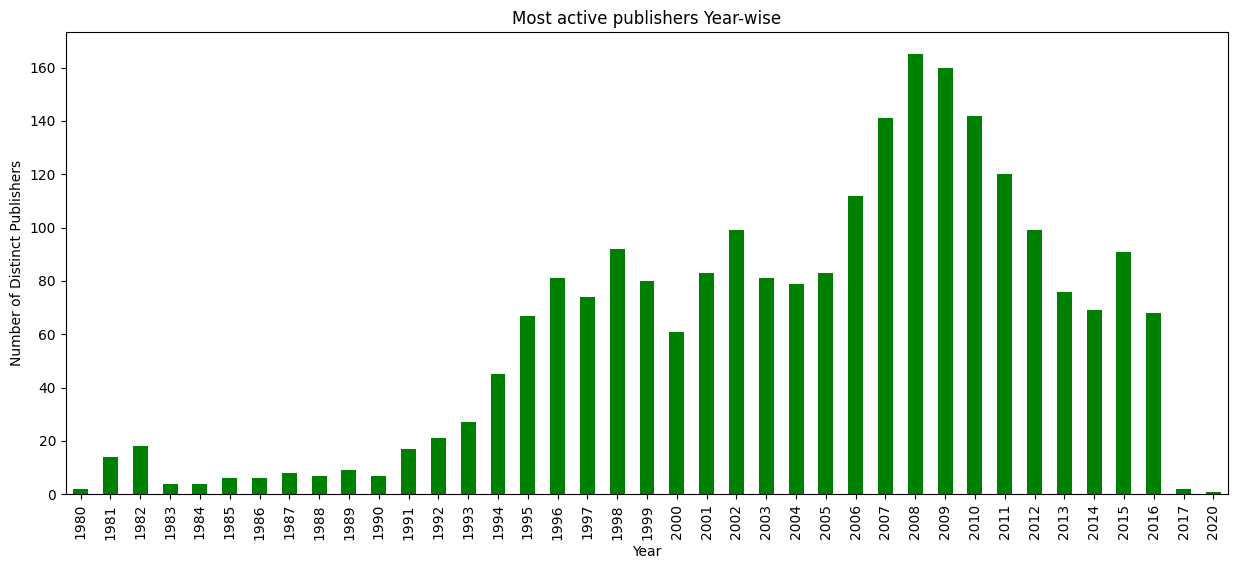

In [ ]:
# Plotting the publishers year-wise in a bar plot
plt.figure(figsize=(15, 6))  # Set the figure size
publishers_by_year.plot(kind='bar', figsize=(15, 6), color='Green')

# Adding axis labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Distinct Publishers')
plt.title('Most active publishers Year-wise')

# Show the plot
plt.show()

# **Aim :**
After ploting we can compare this graph with the graph above and check for congruency between the two.

▶ If both graphs follows the same trend, that will support the legitimacy of data as, number of games released is directly proportional to number of active publishers in a year.

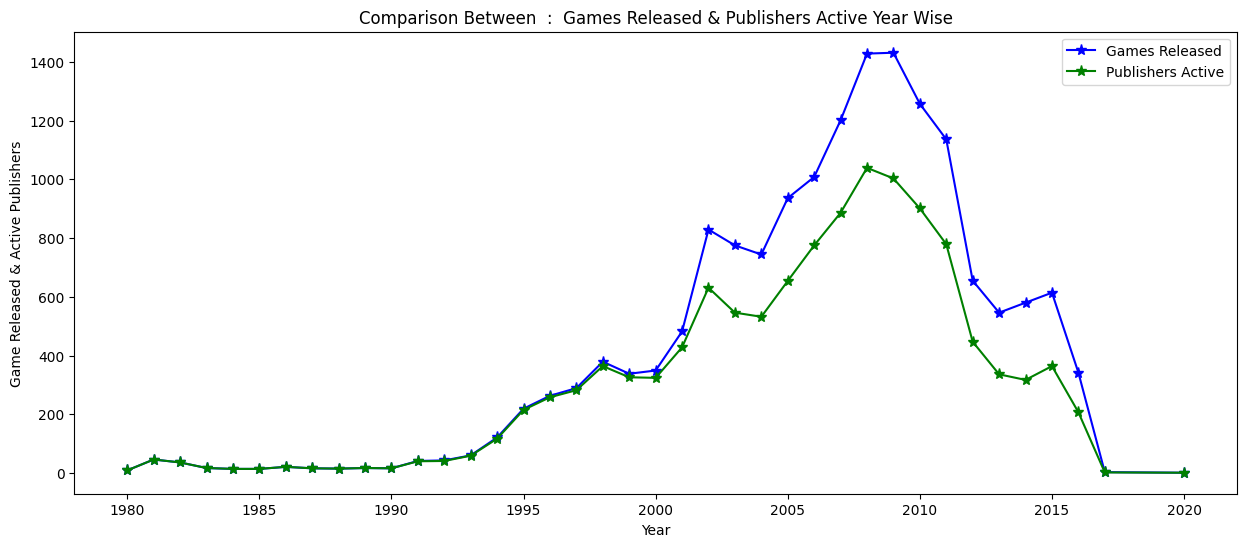

In [ ]:
# Group the Games by their release Year and count the occurrences in each group
Game_counts_by_year = df.groupby('Year')['Name'].count()

# Group the publishers by their release Year and count the occurrences in each group
publishers_by_year = df.groupby('Year')['Name'].nunique()

# Create a single figure
plt.figure(figsize=(15, 6))

plt.plot(Game_counts_by_year, '*-', markersize=8, color='blue')
plt.plot(publishers_by_year, '*-', markersize=8, color='green')

plt.ylabel('Game Released & Active Publishers')
plt.xlabel('Year')
plt.title('Comparison Between  :  Games Released & Publishers Active Year Wise')

plt.legend(["Games Released","Publishers Active"])

plt.show()

Both the graphs follows the same trend, that shows data follows same trend for Games Released & Publishers Active in a year.

In [ ]:
n_df = df[['Year','Global_Sales']].copy()

# **Game Release Year & Global Sales**

* Now we will find out the years in which most no of games are sold.
* We will create a dataframe that will contain Release Years along with Global Sales and subsequently plot them.

In [ ]:
# Group the data by 'Year' and calculate the net global sales in each year
net_global_sales_by_year = n_df.groupby('Year')['Global_Sales'].sum()

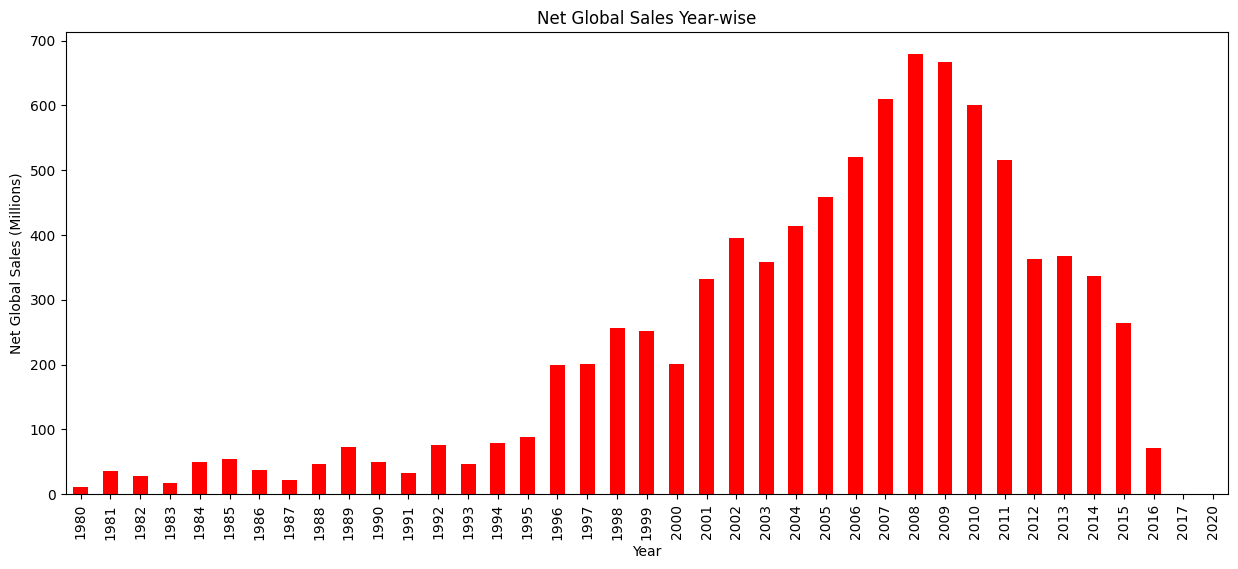

In [ ]:
# Plotting the net global sales year-wise in a bar plot
plt.figure(figsize=(15, 6))  # Set the figure size
net_global_sales_by_year.plot(kind='bar', color='red')

# Adding axis labels and a title
plt.xlabel('Year')
plt.ylabel('Net Global Sales (Millions)')
plt.title('Net Global Sales Year-wise')

# Show the plot
plt.show()

## **INFERENCE**


* From Above graph we can conclude that global sales was highest in YEAR 2008.

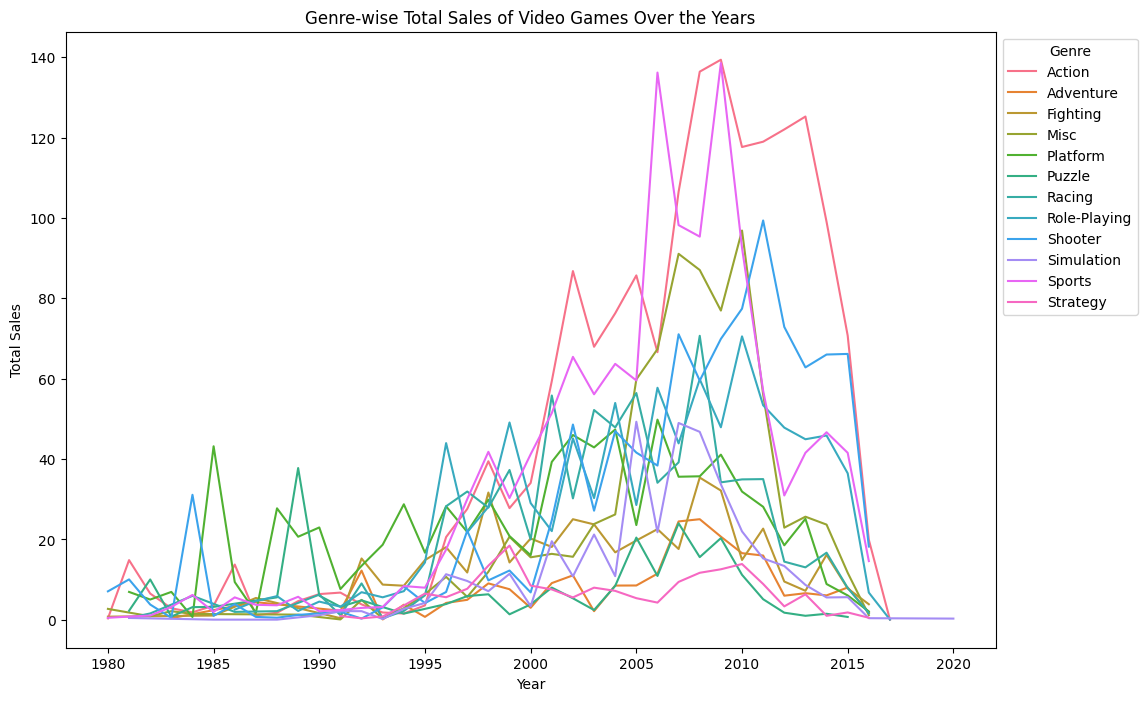

In [ ]:
# Grouping data by genre and year and finding total sales per genre for each year
genre_yearly_sales = df.groupby(['Genre', 'Year'])['Global_Sales'].sum().reset_index()

# Create a pivot table for easy plotting
genre_yearly_pivot = genre_yearly_sales.pivot(index='Year', columns='Genre', values='Global_Sales')
#custom_palette = sns.color_palette('tab20', n_colors=len(genre_yearly_pivot.columns))
# Plotting the time series line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_yearly_pivot, dashes=False)
plt.title('Genre-wise Total Sales of Video Games Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

You can analyze how the popularity of different genres has changed over time. The line chart allows us to observe how the total sales of video games for action and sports genre have experienced significant growth from year 2000 to 2015 and then decline in popularity and sales over time.

The Technological advancements in gaming platforms (e.g., introduction of new consoles, VR, or mobile gaming) may have influenced the sales of different genres, which could be evident from sudden spikes or dips in sales for certain genres.

<Figure size 5000x2500 with 0 Axes>

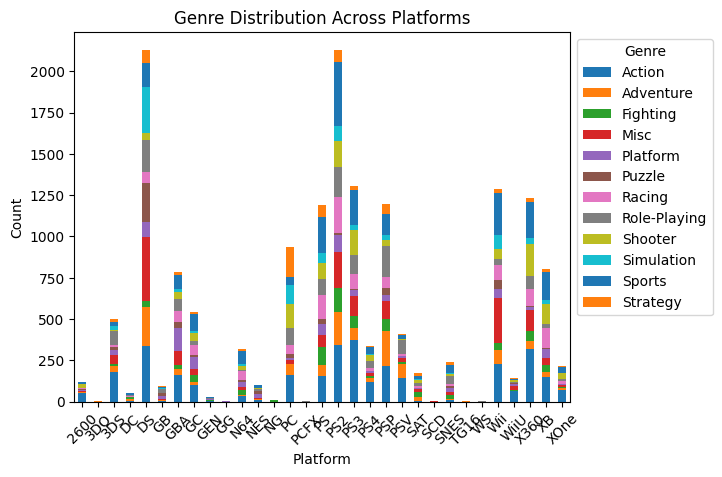

In [ ]:
# Stacked bar plot - Genre distribution across platforms
platform_genre_df = df.groupby(['Platform', 'Genre']).size().unstack(fill_value=0)
plt.figure(figsize=(50, 25))
platform_genre_df.plot(kind='bar', stacked=True)
plt.title('Genre Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

The stacked bar plot allows us to visually compare the popularity of different gaming platforms. The x-axis represents the platforms, and the height of the bars represents the total count of video games available on each platform. We can identify that platforms like PS2 and DS have the highest numbers of games and platforms like 3DO, GG, PCFX, TG16 and WS have the lowest numbers of Genres.

By examining the largest segments of each stacked bar, we can identify Action genres dominate each platform. Some platforms may have a clear dominance of a this genre, which could indicate the platform's target audience in the gaming market.We can assess the diversity of gaming genres on each platform by observing the number of different colored segments in the stacked bars. A platform with a wider variety of genres may appeal to a broader audience and potentially attract gamers with diverse interests.

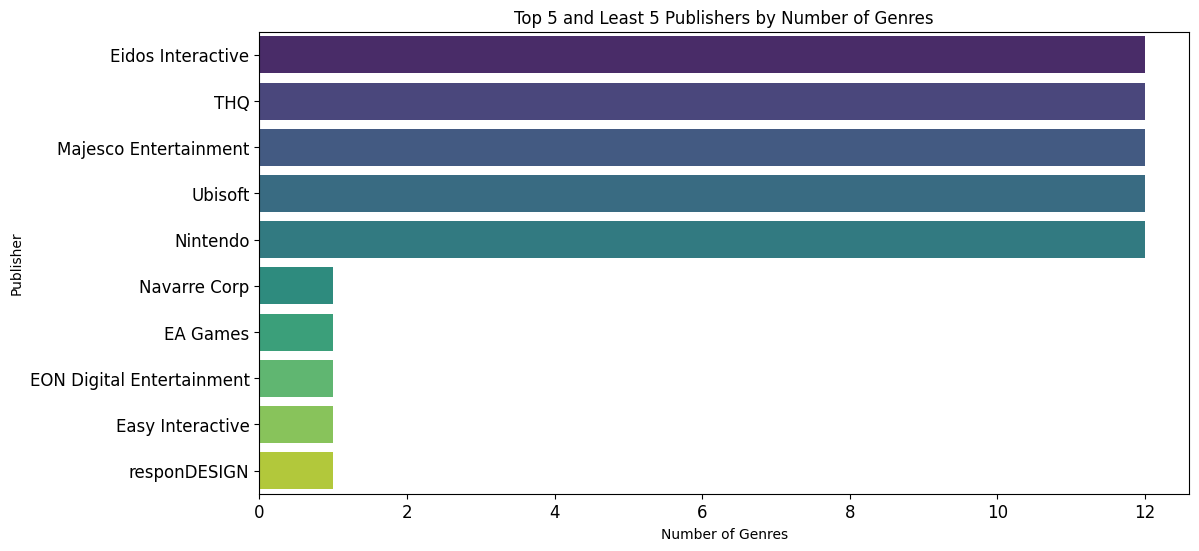

In [ ]:
# Count the number of unique genres for each publisher
genres_per_publisher = df.groupby('Publisher')['Genre'].nunique()

# Sort the publishers by the number of genres in descending order
sorted_genres_per_publisher = genres_per_publisher.sort_values(ascending=False)

# Get the top 5 and least 5 publishers
top_5_publishers = sorted_genres_per_publisher.head(5)
least_5_publishers = sorted_genres_per_publisher.tail(5)

# Concatenate the top 5 and least 5 publishers
top_least_publishers = pd.concat([top_5_publishers, least_5_publishers])

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_least_publishers.values, y=top_least_publishers.index, palette='viridis')
plt.title('Top 5 and Least 5 Publishers by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Publisher')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

By looking at the number of genres, we can assess that the Publisher like Eidos Interactive, THQ Majesco Enterainment, Ubisoft and Nintendo are tend to be more versatile and have more extensive portfolio of game genres, which may indicate a larger and diverse target audience or a successful strategy to cater to different gaming preferences.

while Publisher like Navarre Corp, EA Games, EON, Easy Interactive and responDesign are with fewer genres which may be more niche-oriented, focusing on a particular genre or catering to a specific audience segment.

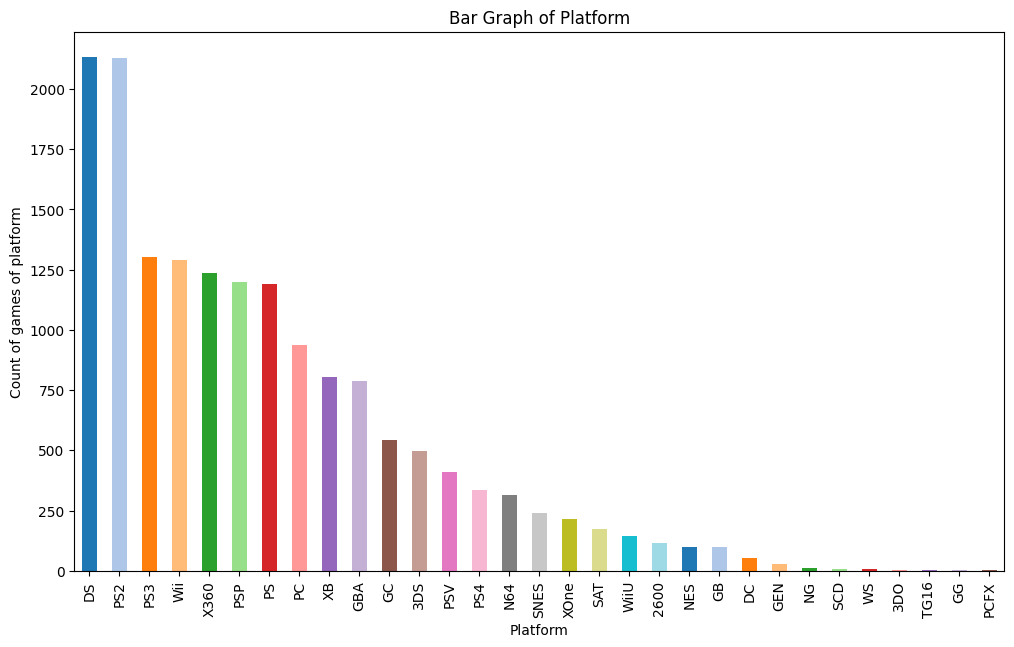

In [ ]:
selected_column = 'Platform'
value_counts = df[selected_column].value_counts()
plt.figure(figsize=(12, 7))
bar_colors = sns.color_palette('tab20', n_colors=len(value_counts))
value_counts.plot(kind='bar', color=bar_colors)

plt.xlabel(selected_column)
plt.ylabel('Count of games of platform')
plt.title(f'Bar Graph of {selected_column}')

plt.show()

By the above bar graph we can see that the most used platform is DS and PS2, the only diffrence is 4.

the least used is PCFX

<Figure size 1600x1200 with 0 Axes>

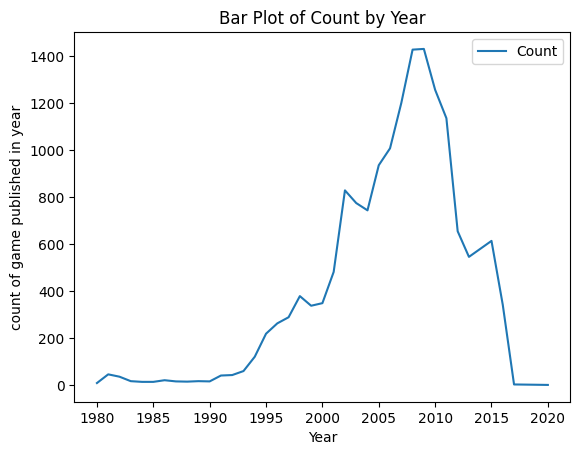

In [ ]:
selected_column = 'Year'
value_counts = df[selected_column].value_counts()

# Convert the count Series into a data frame
count_df = pd.DataFrame({f'{selected_column}': value_counts.index, 'Count': value_counts.values})


sort_by_column = 'Year'

# Sort the data frame based on the selected column in increasing order
df_sorted = count_df.sort_values(by=sort_by_column)

x_column = 'Year'
y_column = 'Count'

# Create the bar plot
plt.figure(figsize=(16, 12))  # Set the size of the bar plot (optional)
bar_colors = sns.color_palette('tab20', n_colors=len(value_counts))
df_sorted.plot(x=x_column, y=y_column,color=bar_colors)
#to make bar use , kind='bar'

# Add labels and title
plt.xlabel(x_column)
plt.ylabel("count of game published in year")
plt.title(f'Bar Plot of {y_column} by {x_column}')

# Display the plot
plt.show()

In [ ]:
grouped_by_year = df.groupby(df['Year'])['Platform'].value_counts()
grouped_counts = grouped_by_year.groupby('Year').size()
new_data_frame = grouped_counts.to_frame()

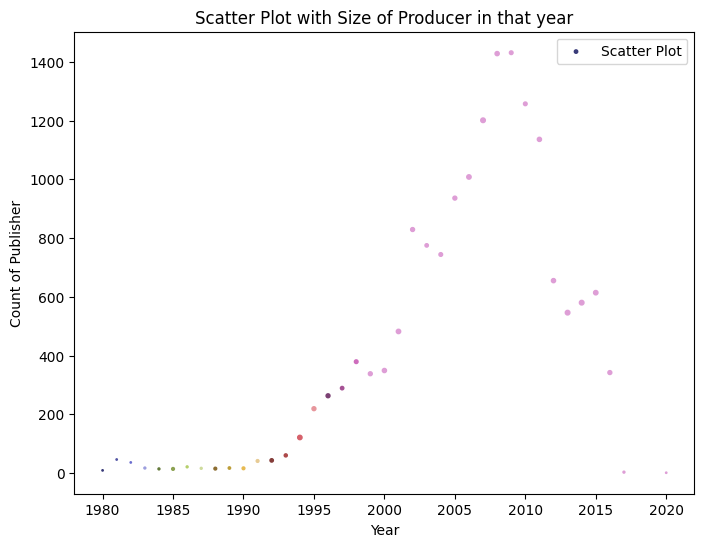

In [ ]:
selected_column = 'Year'
value_counts = df[selected_column].value_counts()

# Convert the count Series into a data frame
count_df = pd.DataFrame({f'{selected_column}': value_counts.index, 'Count': value_counts.values})


sort_by_column = 'Year'

# Sort the data frame based on the selected column in increasing order
df_sorted = count_df.sort_values(by=sort_by_column)

x_column = 'Year'
y_column = 'Count'

#i have taken this from above code
Count=[1,1,1,2,2,4,2,2,4,3,4,4,6,5,10,8,8,6,7,8,9,10,8,6,7,8,10,11,9,7,7,9,9,11,11,10,8,2,1]

#to increase size

plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)

num_colors = 39

# Get a color map from matplotlib
cmap = plt.get_cmap('tab20b')

# Generate an array of 39 distinct colors from the color map
colors = [cmap(i) for i in range(num_colors)]

plt.scatter(df_sorted['Year'], df_sorted['Count'], s=Count, marker='o', c=colors, label='Scatter Plot')

plt.xlabel('Year')
plt.ylabel('Count of Publisher')
plt.title('Scatter Plot with Size of Producer in that year')
plt.legend()

plt.show()

we can conclude that 2008 and 2009 was the year in which most of the games were laucnched. after 2009 the trend start to going down because people were shifting toward different type of mobile games.

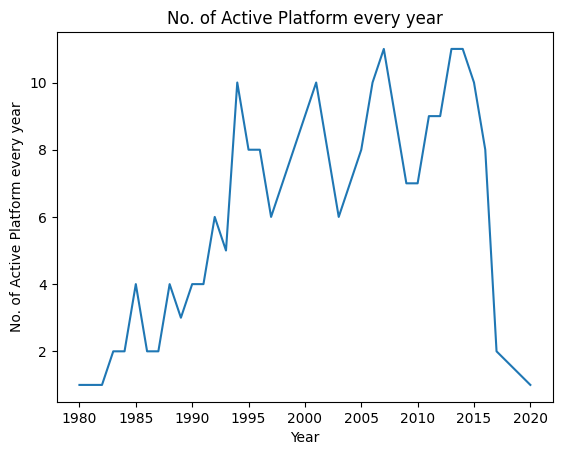

In [ ]:
selected_column = 'Year'
value_counts = df[selected_column].value_counts()

# Convert the count Series into a data frame
count_df = pd.DataFrame({f'{selected_column}': value_counts.index, 'Count': value_counts.values})


sort_by_column = 'Year'

# Sort the data frame based on the selected column in increasing order
df_sorted = count_df.sort_values(by=sort_by_column)

x_column = 'Year'

#i have taken this from above code
Count=[1,1,1,2,2,4,2,2,4,3,4,4,6,5,10,8,8,6,7,8,9,10,8,6,7,8,10,11,9,7,7,9,9,11,11,10,8,2,1]

plt.plot(df_sorted['Year'], Count)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('No. of Active Platform every year')
plt.title('No. of Active Platform every year')

# Show the plot
plt.show()

In this graph we can see the the no. Platfrom was less in starting and end,
In mid it is high. we can conclude that new Platform were coming and some old were going down. because total platfrom was 31 and highest no of participation at one time is 11.

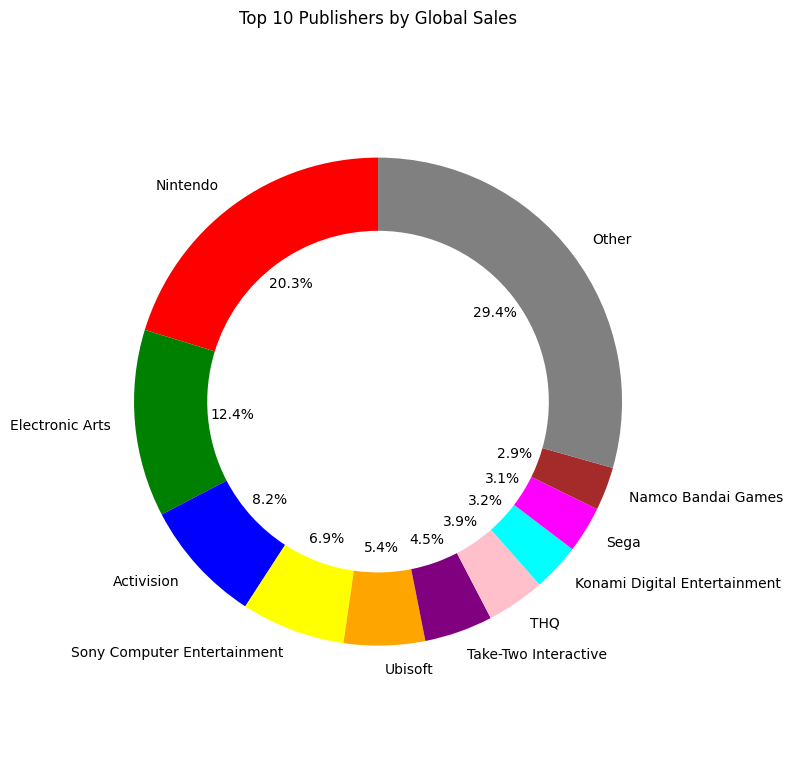

In [ ]:
u_pub=df["Publisher"].nunique()
total_sales=df["Global_Sales"].sum()
sales_sum_by_publishers = df.groupby("Publisher")["Global_Sales"].sum().reset_index()
sorted_data = sales_sum_by_publishers.sort_values(by='Global_Sales', ascending=False)
top_10=sorted_data.head(10)
top_10_sum=sorted_data.head(10).sum()
other_total = total_sales - top_10_sum['Global_Sales']
other_row = pd.DataFrame({"Publisher": ["Other"], "Global_Sales": [other_total]})
top_10_with_other = pd.concat([top_10, other_row])

plt.figure(figsize=(8, 8))
plt.pie(top_10_with_other["Global_Sales"], labels=top_10_with_other["Publisher"], colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown', 'gray'],
autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.title("Top 10 Publishers by Global Sales")
plt.tight_layout()
plt.show()

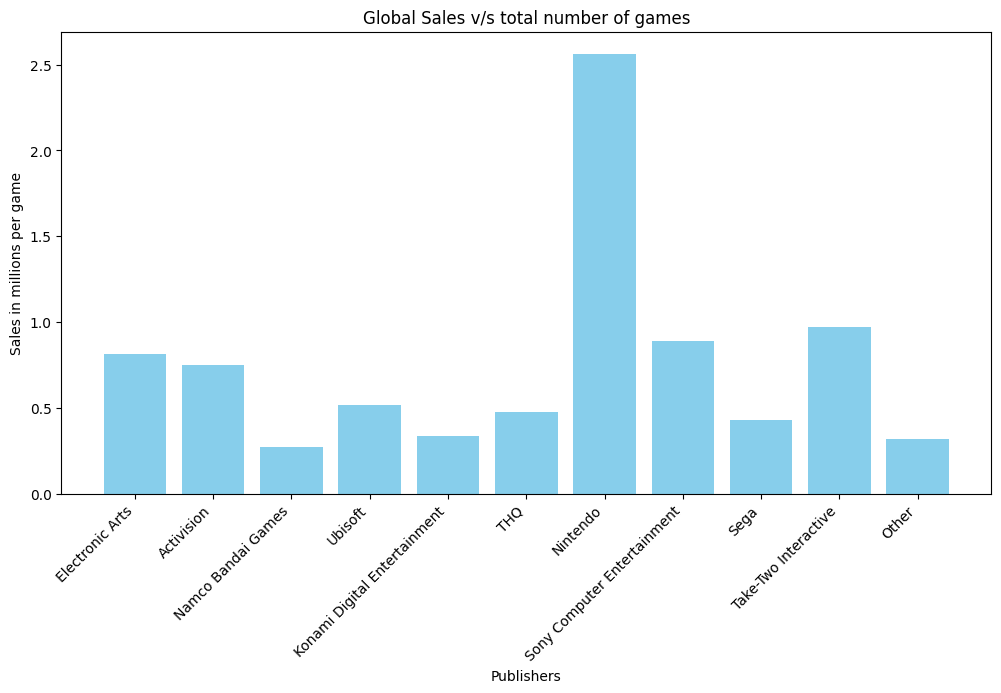

In [ ]:
publisher_count=df["Publisher"].value_counts()
sum_game_10=publisher_count.head(10).sum()
most_game_10=publisher_count.head(10)

other_game=publisher_count.sum()-sum_game_10
combined_series = pd.Series(dict(most_game_10)) #combine series
combined_series['Other'] = other_game
combined_df = pd.DataFrame({'Publisher': combined_series.index, 'Count': combined_series.values}) #series to dataframe
merged_df = pd.merge(combined_df, top_10_with_other, on="Publisher", how="left")  #merging the two dataframes

plt.figure(figsize=(12, 6))
plt.bar(merged_df['Publisher'], (merged_df['Global_Sales']/merged_df['Count']), color='skyblue')
plt.xlabel('Publishers')
plt.ylabel('Sales in millions per game')
plt.title('Global Sales v/s total number of games')
plt.xticks(rotation=45, ha='right')
plt.show()

1. Gloabal sales per game of NINTENDO is the highest ,followed by electronic arts, activision,sony computer entertainment,take-two interactive.
2. Global sales per game of all the other companies combined is less than the major top companies.